# Business Understanding

The dataset that we will examine is the 2017 US Census data. This data was collected to understand the population of the US by measuring for each tract location the demographic make up, the types of jobs, the type of transportation, and the levels of poverty. We are interested in identifying the tracts that have below median level of poverty. Accuracy, precision, and recall will be used to measure the effectiveness of a prediction algorithm.

# Setup

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt

df = pd.read_csv('c:\School Stuff\DS\Machine Learning I\cardio_train_comma.csv')
print(df)

%matplotlib inline

          id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
0          0  18393       2     168    62.0    110     80            1     1   
1          1  20228       1     156    85.0    140     90            3     1   
2          2  18857       1     165    64.0    130     70            3     1   
3          3  17623       2     169    82.0    150    100            1     1   
4          4  17474       1     156    56.0    100     60            1     1   
5          8  21914       1     151    67.0    120     80            2     2   
6          9  22113       1     157    93.0    130     80            3     1   
7         12  22584       2     178    95.0    130     90            3     3   
8         13  17668       1     158    71.0    110     70            1     1   
9         14  19834       1     164    68.0    110     60            1     1   
10        15  22530       1     169    80.0    120     80            1     1   
11        16  18815       2     173    6

In [43]:

df['BMI'] = df['weight']/((df['height']/100)**2)
df['ageyr'] = df['age']/360
df.head()


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,ageyr
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,21.967120,51.091667
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,34.927679,56.188889
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,23.507805,52.380556
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,28.710479,48.952778
5,8,21914,1,151,67.0,120,80,2,2,0,0,0,0,29.384676,60.872222


# Data Meaning Type

<b>Data Definition</b>:

<b>age</b> (Objective):    The age of the patient in days.  Values range from 10798 days (29 years) to 23713 days (about 65 years)
<br><b>height</b> (Objective):   The height of the patient in centimeters.  
<br><b>weight</b> (Objective):  The weight of the patient in Kilograms
<br><b>gender</b>: (Objective):  Categorical code of 1 for woman or 2 for man
<br><b>ap_hi</b>:  (Examination):  Systolic Blood Pressure   Integer 
<br><b>ap_lo</b> (Examination):  Diastolic blood pressure   Integer
<br><b>cholesterol</b> (Examination): 1: normal, 2: above normal, 3: well above normal
<br><b>gluc</b>  (Examination):  Glucose  1: normal, 2: above normal, 3: well above normal
<br><b>smoke</b> (Subjective)   Indicator to determine whether patient smokes or not  (binary)
<br><b>alco</b> (Subjective): Indicator to determine if patient drinks alcohol or not (binary)
<br><b>active</b> (Subjective): Indicator to determine if patient is active or not (binary)
<br><b>cardio</b>:  Target variable to determine if heart disease is present (binary)


df.age.min()  


# Data Quality

In [22]:
df=df.loc[(df.ap_lo>60) & (df.ap_lo<120) & (df.ap_hi<200) & (df.ap_hi>90) & (df.weight>45) & (df.weight<300) & (df.height<200) & (df.height>130)]
df.shape

(64944, 14)

# Simple Statistics

# Visualize Attributes

# Explore Joint Attributes

# Explore Attributes & Class

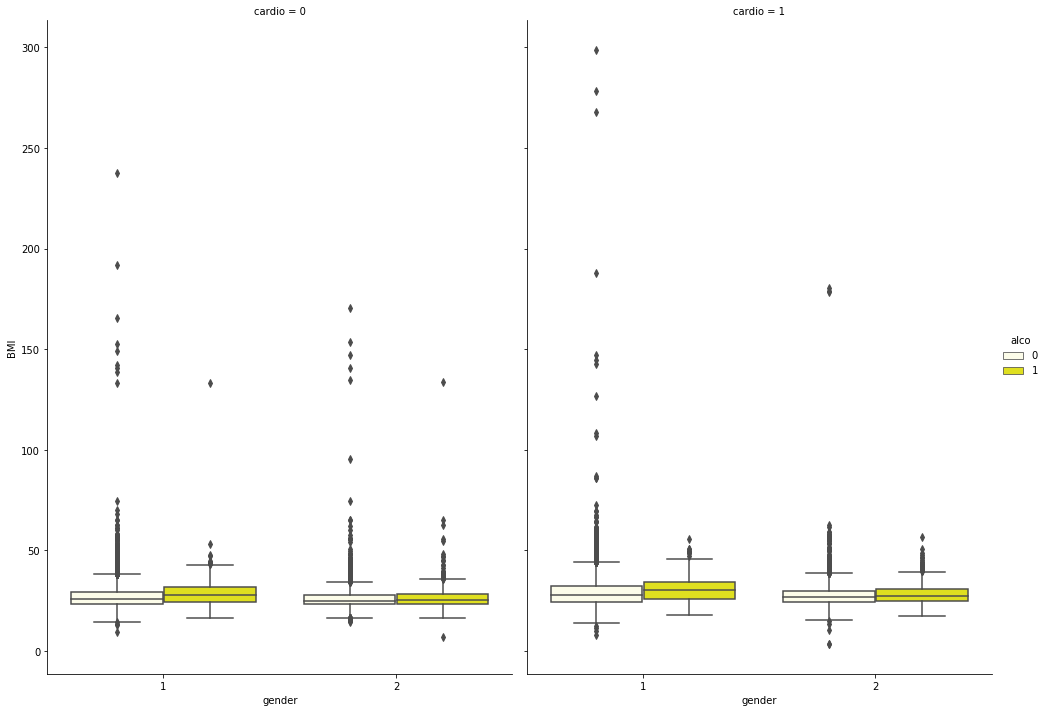

In [7]:
df['BMI'] = df['weight']/((df['height']/100)**2)
sns.catplot(x="gender", y="BMI", hue="alco", col="cardio", data=df, color = "yellow",kind="box", height=10, aspect=.7);

In [47]:
dff=df[(df.gender==1)]
dfm=df[(df.gender==2)]
dff.shape
dff.head()
dfm.shape
dfm.head()


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,ageyr
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,21.967120,51.091667
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,28.710479,48.952778
7,12,22584,2,178,95.0,130,90,3,3,0,0,1,1,29.983588,62.733333
11,16,18815,2,173,60.0,120,80,1,1,0,0,1,0,20.047446,52.263889
12,18,14791,2,165,60.0,120,80,1,1,0,0,0,0,22.038567,41.086111


In [52]:
# Create high probability CVD frame
df_cvd_hi=df[(df.ap_lo>80) & (df.ap_hi>120) & (df.ageyr>54) & (df.gluc>1) & (df.cholesterol>1) & (df.height>130)]
df_cvd_him=dfm[(dfm.ap_lo>80) & (dfm.ap_hi>120) & (dfm.ageyr>54) & (dfm.gluc>1) & (dfm.cholesterol>1) & (dfm.height>130)]
df_cvd_hif=dff[(dff.ap_lo>80) & (dff.ap_hi>120) & (dff.ageyr>54) & (dff.gluc>1) & (dff.cholesterol>1) & (dff.height>130)]

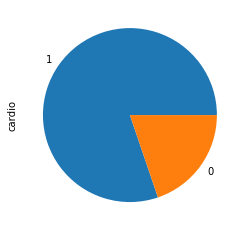

In [53]:
df_cvd_hi["cardio"].value_counts().plot(kind='pie')

# New Features

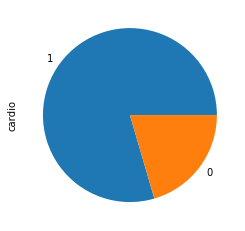

In [54]:
df_cvd_hif["cardio"].value_counts().plot(kind='pie')

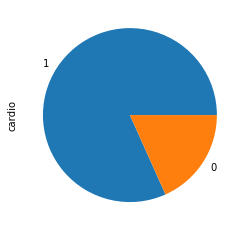

In [55]:
df_cvd_him["cardio"].value_counts().plot(kind='pie')

In [56]:
df_cvd_hi["cardio"].value_counts()

1    1452
0     358
Name: cardio, dtype: int64

In [57]:
df_cvd_him["cardio"].value_counts()

1    469
0    105
Name: cardio, dtype: int64

In [58]:
df_cvd_hif["cardio"].value_counts()

1    983
0    253
Name: cardio, dtype: int64

In [71]:
# Create high probability CVD frame
df_cvd_hi=df[(df.ap_lo>80) & (df.ap_hi>120) & (df.ageyr>54) & (df.gluc>1) & (df.cholesterol>1) & (df.BMI>30)]
 

In [72]:
df_cvd_hi["cardio"].value_counts()


1    576
0    148
Name: cardio, dtype: int64

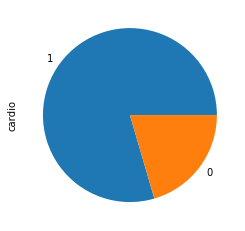

In [73]:
df_cvd_hif["cardio"].value_counts().plot(kind='pie')

# Exceptional Work